## Load Dataset

In [1]:
#!curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data -O
#!curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names -O

In [2]:
#!cat adult.names

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [4]:
df = pd.read_csv('adult.data',delimiter=',',
                      names=['age', 'workclass', 'fnlwgt', 'education', 'education_lvl', 'martial', 'occupation', 'relationship',
                       'race', 'sex', 'captial_gain', 'captial_loss', 'hours_per_week', 'native_country', '50K'])

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_lvl,martial,occupation,relationship,race,sex,captial_gain,captial_loss,hours_per_week,native_country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.isnull().values.any()

False

In [7]:
print(df['50K'].unique()) # Whitespaces detected, Need to convert classifer to 1 or 0 for dataset anaylsis
df['50K'] = df['50K'].map(str.strip)
print(df['50K'].unique())
df['50K'] = df['50K'].map(lambda x: 1 if '>' in x else 0)
print(df['50K'].unique())

[' <=50K' ' >50K']
['<=50K' '>50K']
[0 1]


In [8]:
df_50k = df[(df['50K'] == 1)]
df_non_50k = df[(df['50K'] == 0)]
print("Dataset has {:<5} entries that are 50k {:.2f}%".format(len(df_50k), len(df_50k) / len(df) * 100))
print("Dataset has {:<5} entries that are non 50k {:.2f}%".format(len(df_non_50k), len(df_non_50k) / len(df) * 100))

Dataset has 7841  entries that are 50k 24.08%
Dataset has 24720 entries that are non 50k 75.92%


In [9]:
df_50k.head()

,age,workclass,fnlwgt,education,education_lvl,martial,occupation,relationship,race,sex,captial_gain,captial_loss,hours_per_week,native_country,50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1


In [10]:
df_non_50k.head()

,age,workclass,fnlwgt,education,education_lvl,martial,occupation,relationship,race,sex,captial_gain,captial_loss,hours_per_week,native_country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


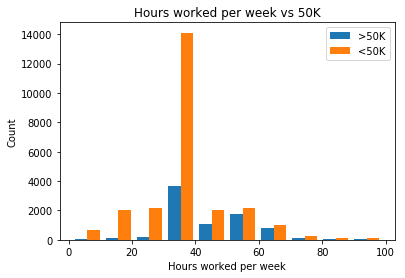

In [11]:
# check most obvious columns show expected values
hours_worked_50k = df_50k['hours_per_week']
hours_worked_non_50k = df_non_50k['hours_per_week']
plt.hist([hours_worked_50k, hours_worked_non_50k], label=['>50K', '<50K'])
plt.title("Hours worked per week vs 50K")
plt.legend(loc='upper right')
plt.xlabel('Hours worked per week')
plt.ylabel('Count')
plt.show()
plt.close()

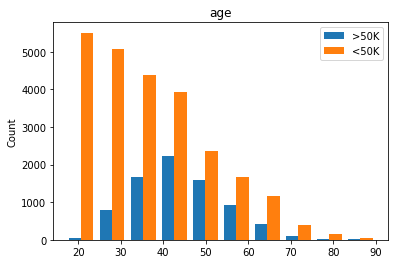

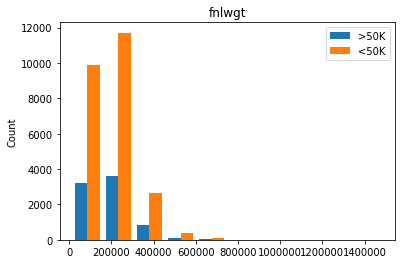

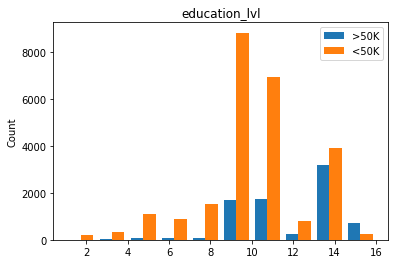

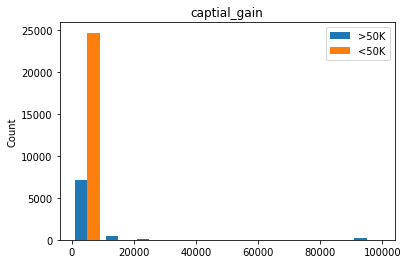

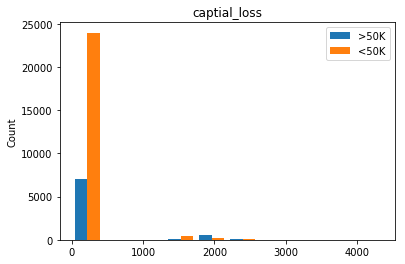

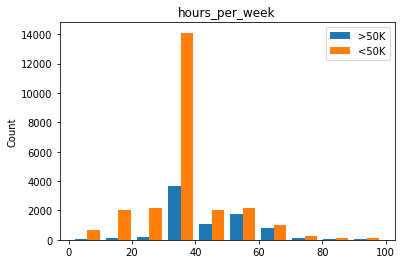

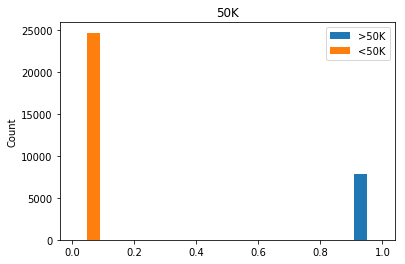

In [12]:
# Plot all numerical columns 50k vs non 50k
def create_pair_hist(df50k, dfnon50k):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    newdf = df50k.select_dtypes(include=numerics)
    for col in newdf:
        plt.hist([df50k[col], dfnon50k[col]], label=['>50K', '<50K'])
        plt.title(col)
        plt.legend(loc='upper right')
        plt.ylabel('Count')
        plt.show()
        plt.close()
create_pair_hist(df_50k, df_non_50k)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabc593f400>,
      dtype=object)

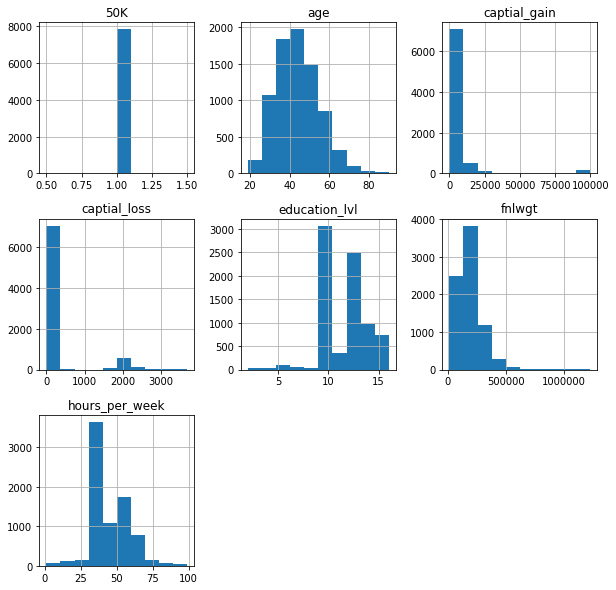

In [13]:
# create histogram of all numeric >50k columns. Compare Distributions
df_50k.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabc593f860>,
      dtype=object)

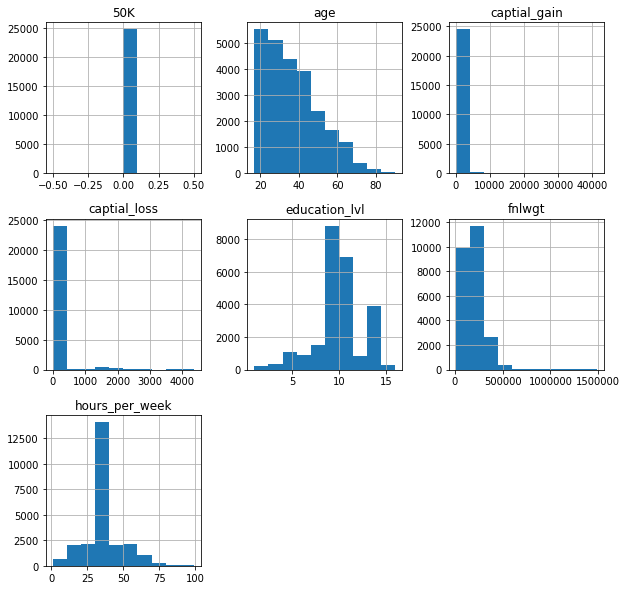

In [14]:
# create histogram of all numeric <50k columns. Compare Distributions
df_non_50k.hist(figsize=(10,10))

In [15]:
df.describe()

,age,fnlwgt,education_lvl,captial_gain,captial_loss,hours_per_week,50K
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [16]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_lvl      int64
martial           object
occupation        object
relationship      object
race              object
sex               object
captial_gain       int64
captial_loss       int64
hours_per_week     int64
native_country    object
50K                int64
dtype: object

## Cleaning Data

In [17]:
# Work on copy of data so we can compare cleaned to old set
# Call copy() to set is_copy to false and not trigger chain warning for assignments
selected_columns = ['workclass', 'age', 'education_lvl', 'martial', 'occupation', 'relationship', 'race', 'sex', 'captial_gain', 'captial_loss', 'hours_per_week', '50K']
dfclean = df[selected_columns].copy()

#### Removing white space

In [18]:
m_labels = ['martial', 'occupation', 'relationship', 'race', 'sex', 'workclass']
def print_unique(m_labels, df):
    accepted_col_values = {}
    for label in m_labels:
        accepted_col_values[label] = df[label].unique()
        s_values = ["- '{}'".format(x) for x in df[label].unique()]
        s_values = "\n".join(s_values)
        print("Unique Values Column '{}':".format(label))
        print(s_values)
        print()
    return accepted_col_values

In [19]:
accepted_cols = print_unique(m_labels, dfclean)

Unique Values Column 'martial':
- ' Never-married'
- ' Married-civ-spouse'
- ' Divorced'
- ' Married-spouse-absent'
- ' Separated'
- ' Married-AF-spouse'
- ' Widowed'

Unique Values Column 'occupation':
- ' Adm-clerical'
- ' Exec-managerial'
- ' Handlers-cleaners'
- ' Prof-specialty'
- ' Other-service'
- ' Sales'
- ' Craft-repair'
- ' Transport-moving'
- ' Farming-fishing'
- ' Machine-op-inspct'
- ' Tech-support'
- ' ?'
- ' Protective-serv'
- ' Armed-Forces'
- ' Priv-house-serv'

Unique Values Column 'relationship':
- ' Not-in-family'
- ' Husband'
- ' Wife'
- ' Own-child'
- ' Unmarried'
- ' Other-relative'

Unique Values Column 'race':
- ' White'
- ' Black'
- ' Asian-Pac-Islander'
- ' Amer-Indian-Eskimo'
- ' Other'

Unique Values Column 'sex':
- ' Male'
- ' Female'

Unique Values Column 'workclass':
- ' State-gov'
- ' Self-emp-not-inc'
- ' Private'
- ' Federal-gov'
- ' Local-gov'
- ' ?'
- ' Self-emp-inc'
- ' Without-pay'
- ' Never-worked'



In [20]:
# strip values in columns
for l in m_labels:
    dfclean[l] = dfclean[l].map(str.strip)

In [21]:
accepted_cols = print_unique(m_labels, dfclean)

Unique Values Column 'martial':
- 'Never-married'
- 'Married-civ-spouse'
- 'Divorced'
- 'Married-spouse-absent'
- 'Separated'
- 'Married-AF-spouse'
- 'Widowed'

Unique Values Column 'occupation':
- 'Adm-clerical'
- 'Exec-managerial'
- 'Handlers-cleaners'
- 'Prof-specialty'
- 'Other-service'
- 'Sales'
- 'Craft-repair'
- 'Transport-moving'
- 'Farming-fishing'
- 'Machine-op-inspct'
- 'Tech-support'
- '?'
- 'Protective-serv'
- 'Armed-Forces'
- 'Priv-house-serv'

Unique Values Column 'relationship':
- 'Not-in-family'
- 'Husband'
- 'Wife'
- 'Own-child'
- 'Unmarried'
- 'Other-relative'

Unique Values Column 'race':
- 'White'
- 'Black'
- 'Asian-Pac-Islander'
- 'Amer-Indian-Eskimo'
- 'Other'

Unique Values Column 'sex':
- 'Male'
- 'Female'

Unique Values Column 'workclass':
- 'State-gov'
- 'Self-emp-not-inc'
- 'Private'
- 'Federal-gov'
- 'Local-gov'
- '?'
- 'Self-emp-inc'
- 'Without-pay'
- 'Never-worked'



In [22]:
dfclean.head()

,workclass,age,education_lvl,martial,occupation,relationship,race,sex,captial_gain,captial_loss,hours_per_week,50K
0,State-gov,39,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,Self-emp-not-inc,50,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,Private,38,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,Private,53,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,Private,28,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0


#### Set Dummy variables

In [23]:
# dummy variables
columns_to_dummy = dfclean.select_dtypes(include='object').columns
dfclean = pd.get_dummies(dfclean, columns=columns_to_dummy)
dfclean.head()

,age,education_lvl,captial_gain,captial_loss,hours_per_week,50K,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,0,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,0,0,40,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


## Build and Train Model

### Random Forest
Randomforest is selected because it is easy to use without much danger of overfitting. However the trade off is performance

In [24]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(dfclean.drop('50K', axis=1), dfclean['50K'], test_size=0.2, random_state=42)

In [25]:
test_x.head()

,age,education_lvl,captial_gain,captial_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
14160,27,10,0,0,38,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
27048,45,9,0,0,40,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
28868,29,13,0,0,55,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
5667,30,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
7827,29,10,2202,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [26]:
test_y.head()

14160    0
27048    0
28868    1
5667     0
7827     0
Name: 50K, dtype: int64

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

## Evaluate Performance

In [28]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8507600184246891

In [29]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)
roc_auc_score(test_y, probabilities[:, 1])

0.8774033402362373

## Model Wrapper

In [30]:
# Double check model is actually predicting test_x
model.predict_proba(pd.DataFrame([test_x.iloc[1]]))[0][0]

0.1

In [31]:
# print variable storages for the input class object (because we have too many variables)
dummy_cols = [col for col in df.select_dtypes(include='object').columns if col in selected_columns]
for x in dummy_cols:
    print("self.{}:str = ''".format(x))

non_dummy_cols = [col for col in df.select_dtypes(exclude='object').columns if col in selected_columns]
for x in non_dummy_cols:
    if x != '50K':
        print("self.{}:int = 0".format(x))

self.workclass:str = ''
self.martial:str = ''
self.occupation:str = ''
self.relationship:str = ''
self.race:str = ''
self.sex:str = ''
self.age:int = 0
self.education_lvl:int = 0
self.captial_gain:int = 0
self.captial_loss:int = 0
self.hours_per_week:int = 0


In [32]:
# This is a prototype version of a wrapper class designed for marking purposes (ease of reading and usage)
# In production, intialization of parameters will be dynamic so that field changes will not require __init__ to be changed
class QueryPerson():
    def __init__(self):
        self.workclass:str = ''
        self.martial:str = ''
        self.occupation:str = ''
        self.relationship:str = ''
        self.race:str = ''
        self.sex:str = ''
        self.age:int = 0
        self.education_lvl:int = 0
        self.captial_gain:int = 0
        self.captial_loss:int = 0
        self.hours_per_week:int = 0
        
    def check_values(self):
        m_dict = vars(self)
        for key in m_dict.keys():
            value = m_dict[key]
            print(key + ':', value)
            if key in accepted_cols.keys() and value not in accepted_cols[key]:
                raise ValueError("{}='{}' not acceptable, use: {}".format(key, value, accepted_cols[key]))
        print('Check Values OK')
        
    def get_pandas_frame(self):
        query_dict = vars(self)
    
        dummy_query_dict = {}

        for k, v in query_dict.items():
            if k in dummy_cols:

                for v2 in accepted_cols[k]:
                    dummy_k = '{}_{}'.format(k, v2)
                    if v2 == v:
                        dummy_query_dict[dummy_k] = 1
                    else:
                        dummy_query_dict[dummy_k] = 0

            else:
                dummy_query_dict[k] = v
        # this took a few mins to figure out, order matters
        # https://stackoverflow.com/questions/51663071/sklearn-fit-vs-predict-order-of-columns-matters
        incorrect_column_order = pd.DataFrame([dummy_query_dict])
        correct_column_order = incorrect_column_order[test_x.columns]
        return correct_column_order

def predict_50k_income(query: QueryPerson):
    q = query.get_pandas_frame()
    return model.predict_proba(q)[0][0]

In [33]:
q = QueryPerson()
q.workclass = 'State-gov'
q.martial = 'Married-civ-spouse'
q.occupation = 'Exec-managerial'
q.relationship = 'Wife'
q.race = 'White'
q.sex = 'Female'
q.age = 45
q.education_lvl = 9
q.hours_per_week = 40
q.check_values()

print("Predicted >50K Income chance: {}".format(predict_50k_income(q)))

workclass: State-gov
martial: Married-civ-spouse
occupation: Exec-managerial
relationship: Wife
race: White
sex: Female
age: 45
education_lvl: 9
captial_gain: 0
captial_loss: 0
hours_per_week: 40
Check Values OK
Predicted >50K Income chance: 0.1
